In [91]:
#чтение данных, так как названия конфет уникальны, используем их в качестве индекса
import pandas as pd
#подключение модели логистической регрессии из библиотеки sklearn
from sklearn.linear_model import LogisticRegression
#подключение библиотеки для вычисления метрик
from sklearn import metrics
#подключим библиотеки для визуализации
import matplotlib.pyplot as plt
%matplotlib inline

DATA = pd.read_csv("/Users/ekaterina/github_repos/ITMO_STUDY/ datasets/IZ_31_ML_candy_Logist_Regr/candy-data.csv", delimiter=',', index_col='competitorname') #
print(DATA)

                       chocolate  fruity  caramel  peanutyalmondy  nougat  \
competitorname                                                              
100 Grand                      1       0        1               0       0   
3 Musketeers                   1       0        0               0       1   
One dime                       0       0        0               0       0   
One quarter                    0       0        0               0       0   
Air Heads                      0       1        0               0       0   
...                          ...     ...      ...             ...     ...   
Snickers Crisper               1       0        1               1       0   
Sour Patch Kids                0       1        0               0       0   
Sour Patch Tricksters          0       1        0               0       0   
Starburst                      0       1        0               0       0   
Strawberry bon bons            0       1        0               0       0   

In [71]:
DATA.count()

chocolate           70
fruity              70
caramel             70
peanutyalmondy      70
nougat              70
crispedricewafer    70
hard                70
bar                 70
pluribus            70
sugarpercent        70
pricepercent        70
winpercent          70
Y                   70
dtype: int64

В прилагаемом файле представлены данные, собранные путем голосования за самые лучшие (или, по крайней мере, самые популярные) конфеты Хэллоуина. Обучите модель логистической регрессии. В качестве предикторов выступают поля: chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, bar, pluribus, sugarpercent, pricepercent, отклик — Y.

В качестве тренировочного набора данных используйте данные из файла, за иключением следующих конфет: Nestle Crunch, Skittles wildberry, Sour Patch Tricksters. Обучите модель.

Если используете Azure ML Studio, укажите random seed = 2019 в параметрах блока Logistic Regression.
Если используете Python, используйте модель с параметрами: LogisticRegression(random_state=2019, solver='lbfgs').
Обучите модель и выполните предсказание для всех конфет из прилагаемого файла тестовых данных.

Введите вероятность отнесения конфеты Twix к классу 1:
Введите вероятность отнесения конфеты Welchs Fruit Snacks к классу 1:

Выполните оценку модели с помощью матрицы ошибок и рассчитайте следующие параметры при пороге отсечения (Treshhold) .

Введите значение Recall, или TPR для тестового набора данных:
Введите значение Precision для тестового набора данных:
Введите значение AUC для тестового набора данных:



In [72]:
#обучение модели будем проводить на данных, за исключением некоторых конфет
train_data = DATA.drop(['Nestle Crunch', 'Skittles wildberry', 'Sour Patch Tricksters'])

In [73]:
#отбор данных для предикторов, удаление дввух последних столбцов, индекс не включается в данные автоматически.
X = pd.DataFrame(train_data.drop(['winpercent', 'Y'], axis = 1))

In [74]:

#отбор столбца для отклика
y = pd.DataFrame(train_data['Y'])

In [75]:
#обучение модели
reg = LogisticRegression(random_state=2019, solver='lbfgs').fit(X, y.values.ravel())

In [76]:
#чтение тестовых данных и отбор предикторов
test_data = pd.read_csv("/Users/ekaterina/github_repos/ITMO_STUDY/ datasets/IZ_31_ML_candy_Logist_Regr/candy-test.csv", delimiter=',', index_col='competitorname')
X_test = pd.DataFrame(test_data.drop(['Y'], axis=1))

In [77]:
print(test_data)

                           chocolate  fruity  caramel  peanutyalmondy  nougat  \
competitorname                                                                  
Sugar Babies                       0       1        1               0       0   
Sugar Daddy                        1       0        0               0       1   
Super Bubble                       0       1        0               0       0   
Swedish Fish                       0       1        0               0       0   
Tootsie Pop                        1       0        0               0       0   
Tootsie Roll Juniors               1       0        0               0       0   
Tootsie Roll Midgies               1       0        0               0       0   
Tootsie Roll Snack Bars            1       0        0               0       0   
Trolli Sour Bites                  0       1        0               0       0   
Twix                               0       1        0               0       0   
Twizzlers                   

In [78]:
#mask = X_test[(X_test['competitorname'] == 'Twix') | (X_test['competitorname'] == 'Welchs Fruit Snacks')]
#print(mask)

In [79]:
#предсказание с помощью обученной модели, порог отсечения по умолчанию составляет 0.5
Y_pred = reg.predict(X_test)
print(Y_pred)

[0 0 0 0 1 1 1 1 0 0 0 0 0 1 1]


In [84]:
#вероятности отнесения к 0 и 1 классу объектов тестовых данных соответствнно Twix
Y_pred_probs = reg.predict_proba(X_test)
print(Y_pred_probs)

[[0.72688331 0.27311669]
 [0.61606289 0.38393711]
 [0.70340889 0.29659111]
 [0.6642209  0.3357791 ]
 [0.2479794  0.7520206 ]
 [0.31590988 0.68409012]
 [0.36928489 0.63071511]
 [0.23787027 0.76212973]
 [0.70832211 0.29167789]
 [0.61656028 0.38343972]
 [0.6962054  0.3037946 ]
 [0.86473482 0.13526518]
 [0.70752961 0.29247039]
 [0.41137444 0.58862556]
 [0.26829866 0.73170134]]


In [81]:
#вероятности отнесения к 0 и 1 классу объектов тестовых данных соответствнно Welchs Fruit Snacks
Y_pred_probs = reg.predict_proba(X_test)
print(Y_pred_probs[13,:])

[0.41137444 0.58862556]


In [82]:
#отбор вероятностей отнесения объектов к классу 1
Y_pred_probs_class_1 = Y_pred_probs[:, 1]
print(Y_pred_probs_class_1)

[0.27311669 0.38393711 0.29659111 0.3357791  0.7520206  0.68409012
 0.63071511 0.76212973 0.29167789 0.38343972 0.3037946  0.13526518
 0.29247039 0.58862556 0.73170134]


In [83]:
#отбор отклика Y из тестовых данных и преобразование в массив
Y_true = (test_data['Y'].to_frame().T).values.ravel()
Y_true

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [87]:
# Рассчет метрик
fpr, tpr, _ = metrics.roc_curve(Y_true, Y_pred)

In [88]:
#вычисляем AUC
metrics.roc_auc_score(Y_true, Y_pred_probs_class_1)

0.84

In [89]:
#вычисление Recall
metrics.recall_score(Y_true, Y_pred)

0.6

In [90]:
#вычисление Precision
metrics.precision_score(Y_true, Y_pred)

0.5

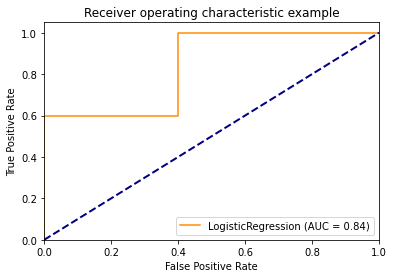

In [92]:
metrics.plot_roc_curve(reg, X_test, Y_true, color='darkorange') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()